## Comparing Two Stations' Hourly Average
For December

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random

Get user input for the stations

In [2]:
state_abbreviations = {
    'alabama': 'AL',
    'alaska': 'AK',
    'arizona': 'AZ',
    'arkansas': 'AR',
    'california': 'CA',
    'colorado': 'CO',
    'connecticut': 'CT',
    'delaware': 'DE',
    'florida': 'FL',
    'georgia': 'GA',
    'hawaii': 'HI',
    'idaho': 'ID',
    'illinois': 'IL',
    'indiana': 'IN',
    'iowa': 'IA',
    'kansas': 'KS',
    'kentucky': 'KY',
    'louisiana': 'LA',
    'maine': 'ME',
    'maryland': 'MD',
    'massachusetts': 'MA',
    'michigan': 'MI',
    'minnesota': 'MN',
    'mississippi': 'MS',
    'missouri': 'MO',
    'montana': 'MT',
    'nebraska': 'NE',
    'nevada': 'NV',
    'new hampshire': 'NH',
    'new jersey': 'NJ',
    'new mexico': 'NM',
    'new york': 'NY',
    'north carolina': 'NC',
    'north dakota': 'ND',
    'ohio': 'OH',
    'oklahoma': 'OK',
    'oregon': 'OR',
    'pennsylvania': 'PA',
    'rhode island': 'RI',
    'south carolina': 'SC',
    'south dakota': 'SD',
    'tennessee': 'TN',
    'texas': 'TX',
    'utah': 'UT',
    'vermont': 'VT',
    'virginia': 'VA',
    'washington': 'WA',
    'west virginia': 'WV',
    'wisconsin': 'WI',
    'wyoming': 'WY'
}

# Getting the first state and ID
state1 = input("Enter the name of the first state: ")
while(not(state1.lower() in state_abbreviations.keys())):
    state1 = input("Enter a valid state: ")

abbreviation1 = state_abbreviations[state1.lower()]

state2 = input("Enter the name of the second state: ")
while(not(state2.lower() in state_abbreviations.keys())):
    state2 = input("Enter a valid state: ")

abbreviation2 = state_abbreviations[state2.lower()]

print('state1 ' + state1)
print('state2 ' + state2)

state1 california
state2 california


Loads the data from two files


In [3]:
state1_data = pd.read_csv(f"dec_2015_ccs_data_converted/{abbreviation1}_DEC_2022 (TMAS).csv", dtype = { 'Record_Type': int, 'State_Code' : int, 'F_System' : str, 'Station_Id' : str, 'Travel_Dir' : int, 'Year_Record' : int,
                                                                                                       'Month_Record': int,'Day_Record' : int,'Day_of_Week' : int,'Hour_Record' : int ,'Hour_Volume' : int ,'Restrictions' : int})
state2_data = pd.read_csv(f"dec_2015_ccs_data_converted/{abbreviation2}_DEC_2022 (TMAS).csv", dtype = { 'Record_Type': int, 'State_Code' : int, 'F_System' : str, 'Station_Id' : str, 'Travel_Dir' : int, 'Year_Record' : int,
                                                                                                       'Month_Record': int,'Day_Record' : int,'Day_of_Week' : int,'Hour_Record' : int ,'Hour_Volume' : int ,'Restrictions' : int})

Gets user input for stations

In [4]:
#Gets station ID input
station_id_input = input('Next, enter the station id from ' + abbreviation1)
if(station_id_input.lower() == 'r'): 
    # sample() gets a random row
    station_id1 = state1_data.sample()['Station_Id'].values[0]
else:
    station_id1 = station_id_input

station_id_input = input('Next, enter the station id from ' + abbreviation2)
if(station_id_input.lower() == 'r'): 
    # sample() gets a random row
    station_id2 = state2_data.sample()['Station_Id'].values[0]
else:
    station_id2 = station_id_input

print('id1 : ' + station_id1)
print('id2 : ' + station_id2)

id1 : 129130
id2 : 096540


Finds the average for the two stations

In [5]:
#smaller data frames 
station1 = state1_data[state1_data['Station_Id'] == station_id1]

hour_average_station1 = dict.fromkeys(range(0,24),0)
days = 31

for index, row, in station1.iterrows():
    hour_average_station1[row['Hour_Record']] += row['Hour_Volume']

for key in hour_average_station1:
    hour_average_station1[key] = round(hour_average_station1[key] / days)


station2 = state2_data[state2_data['Station_Id'] == station_id2]

hour_average_station2 = dict.fromkeys(range(0,24),0)

for index, row, in station2.iterrows():
    hour_average_station2[row['Hour_Record']] += row['Hour_Volume']

for key in hour_average_station2:
    hour_average_station2[key] = round(hour_average_station2[key] / days)

Plots a side by side bar graph


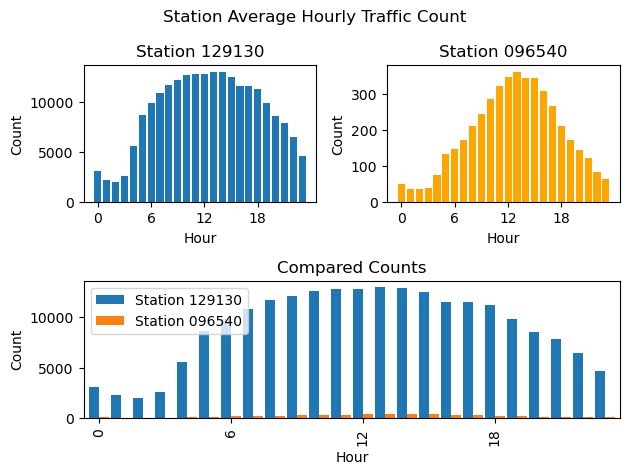

In [6]:
#creates a plot with three colums of side plot
#fig, axs = plt.subplot(nrows = 2,ncols = 2, squeeze=True)


ax1 = plt.subplot(2,2,1)
ax1.bar(hour_average_station1.keys(), hour_average_station1.values())
ax1.set_title(f'Station {station_id1}')
ax1.set_ylabel('Count')
ax1.set_xlabel('Hour')
ax1.set_xticks([i for i in range(0,24,6)])

ax2 = plt.subplot(2,2,2)
ax2.bar(hour_average_station2.keys(), hour_average_station2.values(), color = 'orange')
ax2.set_title(f'Station {station_id2}')
ax2.set_ylabel('Count')
ax2.set_xlabel('Hour')
ax2.set_xticks([i for i in range(0,24,6)])

side_by_side = pd.DataFrame({
    f'Station {station_id1}': hour_average_station1,
    f'Station {station_id2}': hour_average_station2
})

ax3 = plt.subplot(2,1,2)

side_by_side.plot.bar(ax = ax3,width=0.9)
ax3.set_xticks([i for i in range(0,24,6)])
ax3.set_xlabel('Hour')
ax3.set_ylabel('Count')
ax3.set_title('Compared Counts')


plt.suptitle('Station Average Hourly Traffic Count')
# Makes sure theres no overlap
plt.tight_layout()
plt.show()
